# **Geological facies connectivity and upscaling in reservoir simulation for production forecasts optimization**
## **2D and 3D hydraulic conductivity maps**
### Upscaling of flow in multi-gaussian media

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import numpy as np
import os

/tmp/ipykernel_1067106/2373158720.py:66: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=0.1)  # Increase bottom margin


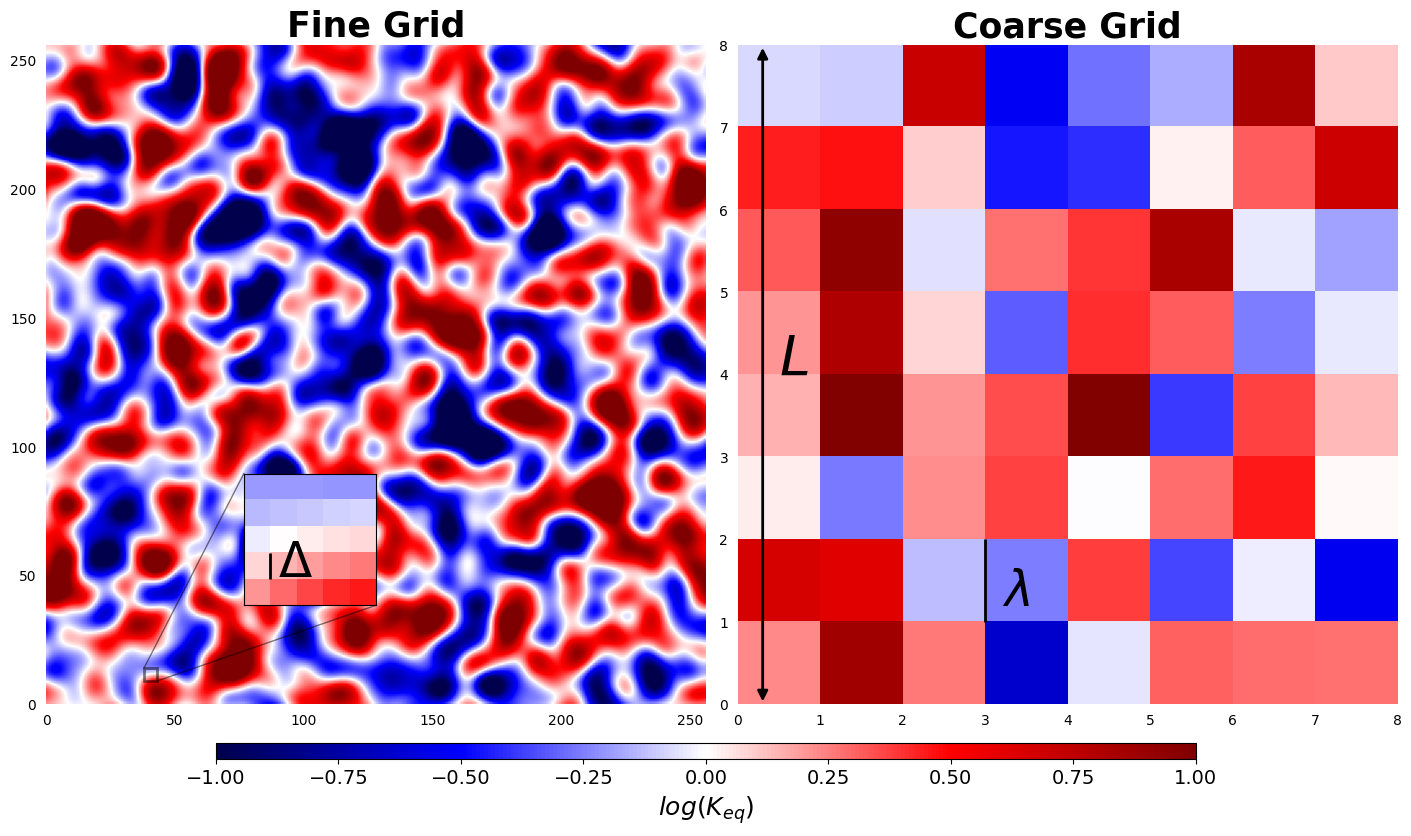

In [ ]:
### Slice of 3D hydraulic conductivity maps to show different spatial scales with inset ###

os.makedirs('kmaps_plots', exist_ok=True)

dirCon = ['./3d/3dint/', './3d/3dcon/', './3d/3ddis/']
dirVar = ['0.5/', '1/', '2/']

seed = 3
coarse_scale = 32

k_FG = np.load(dirCon[0]+dirVar[0]+str(seed)+'/k.npy')
k_CG = np.load(dirCon[0]+dirVar[0]+str(seed)+'/KpostProcess/Kperm'+str(coarse_scale)+'.npy')

# Create figure with adjusted height to accommodate colorbar
fix, ax = plt.subplots(1, 2, layout='constrained', figsize=(14,8))

ext1 = (0, 256, 0, 256)
ext2 = (0, 8, 0, 8)

v = 1
vcs = .5
cmap = 'seismic'

cmap1 = ax[0].imshow(np.log(k_FG[:,:,0]), extent=ext1, vmin=-v, vmax=v, cmap=cmap)
cmap2 = ax[1].imshow(np.log(k_CG[:,:,0]), extent=ext2, vmin=-vcs, vmax=vcs, cmap=cmap)

maps = ['Fine Grid', 'Coarse Grid']

for m in range(len(maps)):
    ax[m].set_title(maps[m], fontsize=25, weight='bold')
    ax[m].tick_params(left=False, bottom=False)
    
### Inset     
x1, x2, y1, y2 = 38,43,9,14
axins = ax[0].inset_axes([0.15, 0.15, 0.5, 0.20], xlim=(x1, x2), ylim=(y1, y2))
ax[0].indicate_inset_zoom(axins, edgecolor='black', linewidth=2)
axins.imshow(np.log(k_FG[:,:,0]), extent=ext1, vmin=-v, vmax=v, cmap=cmap)
axins.text(39.3, 10.1, r'$\Delta$', fontsize=35, color='black')
axins.vlines(39, 10, 11, colors='black', lw=2)
axins.set(yticklabels=[], xticklabels=[])
axins.tick_params(left=False, bottom=False)

long = patches.FancyArrowPatch((0.3,0), (0.3, 8), arrowstyle='<|-|>', mutation_scale=15, edgecolor= 'black', facecolor='black', linewidth=2)
ax[1].add_patch(long)
ax[1].text(0.5,4, r'$\it{L}$', fontsize=40)

ax[1].vlines(3, 1, 2, colors='black', lw=2)
ax[1].text(3.2, 1.2, r'$\lambda$', fontsize=35, color='black')

spines = ['left', 'top', 'right', 'bottom']
axis = [0, 1]

for spines in spines:
    for i in axis:
        ax[i].spines[spines].set_visible(False)

# Move colorbar further down by adjusting the position parameters
cbar_ax = fix.add_axes([0.15, 0.02, 0.7, 0.02])  # [left, bottom, width, height]
# Changed bottom position from 0.05 to 0.02 to move it lower

cbar = fix.colorbar(cmap1, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'$log(K_{eq})$', fontsize=18, labelpad=5)  # Added labelpad for better spacing
cbar.ax.tick_params(labelsize=14)

# Adjust the layout to prevent colorbar cutoff
plt.subplots_adjust(bottom=0.1)  # Increase bottom margin
plt.savefig('kmap_plots/01_upscaling_seismic.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

**Fig. 1**: Scheme of the spatial scales involved in the upscaling procedure. (left) The local point values of hydraulic conductivity k(r), here reflecting those of a 2D multigaussian media sample of linear size L, are defined over a fine grid with linear cell size Δ (this length is given by the image pixel size as show in the inset zoom). The integral scale I yields the heterogeneity characteristic length-scale. After upscaling (right), the equivalent hydraulic conductivity Keq is defined over a coarse grid of linear cell size λ. This example corresponds to a 2D slice of a 3D media of linear size of L=256Δ, l=16Δ and λ=32Δ.

## **Generation of hydraulic conductivity maps**
### 2D and 3D media samples for different conductivity structures

In [ ]:
### 2D hydraulic conductivity maps: different connectivity structures: Intermediate, High, Low ###

con1 = ['./2d/ns/2d_1024L_64r_ns/',  './2d/2dint_128/']
con2 = ['./2d/2dcon_128/', './2d/2ddis_128/']
var = ['0.5/', '1/', '2/']
label_con = ['ICS','HCS','LCS']

ext = (0, 1024, 0, 1024)
cmap1='seismic'
v = 1
num1=['a','b']
num2=['c','d']

fig, ax = plt.subplots(1,2,figsize=(15,15), layout='constrained')
for icon in range(len(con1)):
    
    k = np.load(con1[icon]+var[1]+'0/k.npy')
    im = ax[icon].imshow(np.log(k), vmin=-v, vmax=v, extent=ext, cmap=cmap1)
    ax[icon].set_xticks([])
    ax[icon].set_yticks([])
    #ax[icon].set_title(label_con[icon], fontsize=15, weight='bold')
    #ax[icon].set_title(num[icon], loc='left', fontsize=16, weight='bold')
    
    x1, x2, y1, y2 = 50,150,50,150
    axins = ax[icon].inset_axes([0, 0, 0.40, 0.40], xlim=(x1, x2), ylim=(y1, y2))#, xticklabels=[], yticklabels=[])
    ax[icon].indicate_inset_zoom(axins, edgecolor='red', linewidth=2)
   
    axins.imshow(np.log(k), extent=ext, vmin=-v, vmax=v, cmap=cmap1)
    axins.set(yticklabels=[], xticklabels=[])
    axins.tick_params(left=False, bottom=False)
    ## Test 1
    ax[icon].text(12, 974, num1[icon], style='normal', fontsize=24, weight='bold',
            bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

plt.savefig('kmap_plots/02_conectivity_st_1.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()
    
fig, ax = plt.subplots(1,2,figsize=(15,15), layout='constrained')
for icon in range(len(con2)):
    k = np.load(con2[icon]+var[1]+'0/k.npy')
    im = ax[icon].imshow(np.log(k), vmin=-v, vmax=v, extent=ext, cmap=cmap1)
    ax[icon].set_xticks([])
    ax[icon].set_yticks([])
    #ax[icon].set_title(label_con[icon], fontsize=15, weight='bold')
    #ax[icon].set_title(num[icon], loc='left', fontsize=16, weight='bold')
    
    x1, x2, y1, y2 = 50,150,50,150
    axins = ax[icon].inset_axes([0, 0, 0.40, 0.40], xlim=(x1, x2), ylim=(y1, y2))#, xticklabels=[], yticklabels=[])
    ax[icon].indicate_inset_zoom(axins, edgecolor='red', linewidth=2)
   
    axins.imshow(np.log(k), extent=ext, vmin=-v, vmax=v, cmap=cmap1)
    axins.set(yticklabels=[], xticklabels=[])
    axins.tick_params(left=False, bottom=False)
    ## Test 1
    ax[icon].text(12, 974, num2[icon], style='normal', fontsize=24, weight='bold',
            bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})
cb = fig.colorbar(im, shrink=.75, orientation='horizontal', pad=0.02, ax=ax.ravel().tolist())
cb.set_label(label='$log(K_{eq})$', fontsize=18)

plt.savefig('kmap_plots/02_conectivity_st_2.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()
 
# cbar_ax = fig.add_axes([1.02, 0.4, 0.02, 0.2])
# cbar = fig.colorbar(im, cax=cbar_ax, shrink=1)
# fig.subplots_adjust(right=1)
# cbar.ax.set_title('$\log\ (K_{eq})}$')

**Fig. 2**: Maps of Y (log kr) of the connectivity structures used in this study. (a, b, c, d) 2D samples with linear size L=1024Δ, the left bottom corner shows a zoom for easier visualization. (a) No structure, (b) intermediate, (c) high and (d) low connectivity structures.

In [ ]:
### 2D hydraulic conductivity maps: different connectivity structures: Intermediate, High, Low ###

con = ['./2d/2dint_128/', './2d/2ddis_128/', './2d/2dcon_128/']
var = ['0.5/', '1/', '2/']
label_con = ['ICS','HCS','LCS']
stCon = ['Intermediate Connectivity Structure', 'Low Connectivity Structure', 'High Connectivity Structure' ]
color = ['red', 'darkgreen', 'navy']

ext = (0, 1024, 0, 1024)
cmap1='seismic'
v = 1
num=['a','b','c']

fig, ax = plt.subplots(1,3,figsize=(15,15), layout='constrained')
for icon in range(len(con)):
    k = np.load(con[icon]+var[1]+'15/k.npy')
    im = ax[icon].imshow(np.log(k), vmin=-v, vmax=v, extent=ext, cmap=cmap1)
    ax[icon].set_xticks([])
    ax[icon].set_yticks([])
    #ax[icon].set_title(label_con[icon], fontsize=15, weight='bold')
    #ax[icon].set_title(num[icon], loc='left', fontsize=16, weight='bold')
    
    x1, x2, y1, y2 = 50,150,50,150
    axins = ax[icon].inset_axes([0, 0, 0.45, 0.45], xlim=(x1, x2), ylim=(y1, y2))#, xticklabels=[], yticklabels=[])
    ax[icon].indicate_inset_zoom(axins, edgecolor='red', linewidth=2)
    ax[icon].set_title(stCon[icon], fontsize=16, loc='center', weight='bold')
   
    axins.imshow(np.log(k), extent=ext, vmin=-v, vmax=v, cmap=cmap1)
    axins.set(yticklabels=[], xticklabels=[])
    axins.tick_params(left=False, bottom=False)
    ## Test 1
    #ax[icon].text(20, 962, num[icon], style='normal', fontsize=18, weight='bold',
    #        bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 6})
 
cb = fig.colorbar(im, shrink=.3)
cb.set_label(label='$log(k_{r})$', fontsize=18)
plt.savefig('kmap_plots/03_conectivity_st_3.png', dpi=100, bbox_inches='tight')
# cbar_ax = fig.add_axes([1.02, 0.4, 0.02, 0.2])
# cbar = fig.colorbar(im, cax=cbar_ax, shrink=1)
# fig.subplots_adjust(right=1)
# cbar.ax.set_title('$\log\ (K_{eq})}$')
plt.show()
plt.close()

**Fig. 3**: Maps of Y (log kr) of the connectivity structures used in this study. (a, b, c) 2D samples with linear size L=1024Δ, the left bottom corner shows a zoom for easier visualization. (a) Intermediate, (b) high and (c) low connectivity structures.

In [ ]:
def plot_3d_conductivity_maps():
    """ Plot 3D hydraulic conductivity maps for different connectivity structures. """
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.colors
    import numpy as np
    import os

    os.makedirs("3D_plots", exist_ok=True)

    # Configuration
    rg = 256  # Resolution for surfaces
    var = 0   # Variance index
    norm = matplotlib.colors.CenteredNorm(1.25, -0.75)  # Centered colormap normalization
    
    base_dirs = ['./3d/3dint/', './3d/3dcon/', './3d/3ddis/', './3d/3d_noSt/']
    var_dirs = ['0.5/', '1/', '2/']
    labels = ['Intermediate', 'High', 'Low', 'No Structure']
    panel_labels = ['a', 'b', 'c', 'd']
    
    fig = plt.figure(figsize=(20, 15))
    
    for idx, (base_dir, label, panel) in enumerate(zip(base_dirs, labels, panel_labels)):
        ax = fig.add_subplot(2, 2, idx+1, projection='3d')
        
        if idx < 3:  # Structured cases
            data_path = os.path.join(base_dir, var_dirs[0], '0/k.npy')
        else:  # No structure case
            data_path = os.path.join(base_dir, '0/k.npy')
            
        data = np.load(data_path)
        N = data.shape[0]
        
        x = np.linspace(0, 1, N)
        y = np.linspace(0, 1, N)
        z = np.linspace(0, 1, N)
        X, Y, Z = np.meshgrid(x, y, z, indexing='xy')
        
        # Plot surfaces
        faces = [0, N-1]
        for face in faces:
            # XY planes
            ax.plot_surface(X[:, :, face], Y[:, :, face], Z[:, :, face],
                          facecolors=plt.cm.seismic(norm(data[:, :, face])),
                          rstride=N//rg, cstride=N//rg)
            # XZ planes
            ax.plot_surface(X[:, face, :], Y[:, face, :], Z[:, face, :],
                          facecolors=plt.cm.seismic(norm(data[:, face, :])),
                          rstride=N//rg, cstride=N//rg)
            # YZ planes
            ax.plot_surface(X[face, :, :], Y[face, :, :], Z[face, :, :],
                          facecolors=plt.cm.seismic(norm(data[face, :, :])),
                          rstride=N//rg, cstride=N//rg)
        
        ax.set_title(f"{label} Connectivity", pad=20, fontsize=14, weight='bold')
        ax.text2D(0.05, 0.95, panel, transform=ax.transAxes, 
                 fontsize=16, weight='bold')
        
        for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
            axis.set_ticklabels([])
            axis.set_ticks([])
            axis.set_pane_color((0, 0, 0, 0))
            axis.line.set_color((1.0, 1.0, 1.0, 0.0))
        
        # Set view angle
        ax.view_init(25, 35)
    
    cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = plt.cm.ScalarMappable(norm=norm, cmap='seismic')
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label(r'$log(K_{eq})$', fontsize=14)
    
    plt.tight_layout()
    save_path = os.path.join('kmap_plots', '04_3D_connectivity_maps_all.png')
    plt.savefig(save_path, dpi=100, bbox_inches='tight')
    print(f"Plot saved as {save_path}")
    plt.show()
    plt.close()

plot_3d_conductivity_maps()

In [ ]:
def plot_3d_conductivity_maps():
    """ Plot 3D hydraulic conductivity maps using Plotly. """
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import numpy as np
    import os
    
    os.makedirs("3D_plots", exist_ok=True)
    
    var = 0

    base_dirs = ['./3d/3dint/', './3d/3dcon/', './3d/3ddis/']
    var_dirs = ['0.5/', '1/', '2/']
    labels = ['Intermediate', 'High', 'Low']
    panel_labels = ['a', 'b', 'c']
    
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=[f"{label} Connectivity" for label in labels],
        specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]]
    )
    
    for idx, (base_dir, label, panel) in enumerate(zip(base_dirs, labels, panel_labels)):
        # Load data
        data_path = os.path.join(base_dir, var_dirs[0], '0/k.npy')
        data = np.load(data_path)
        N = data.shape[0]
        
        x = np.linspace(0, 1, N)
        y = np.linspace(0, 1, N)
        X, Y = np.meshgrid(x, y)
        
        trace1 = go.Surface(
            x=X, y=Y, z=np.zeros_like(X),
            surfacecolor=np.log(data[:, :, 0]),
            colorscale='RdBu',
            cmin=-1.25,
            cmax=1.25,
            showscale=idx == 2,  # Only show colorbar for last plot
            name=f'{label} Front'
        )
        
        trace2 = go.Surface(
            x=X, y=np.ones_like(X), z=Y,
            surfacecolor=np.log(data[:, -1, :]),
            colorscale='RdBu',
            cmin=-1.25,
            cmax=1.25,
            showscale=False,
            name=f'{label} Top'
        )
        
        trace3 = go.Surface(
            x=np.ones_like(X), y=X, z=Y,
            surfacecolor=np.log(data[-1, :, :]),
            colorscale='RdBu',
            cmin=-1.25,
            cmax=1.25,
            showscale=False,
            name=f'{label} Side'
        )
        
        fig.add_trace(trace1, row=1, col=idx+1)
        fig.add_trace(trace2, row=1, col=idx+1)
        fig.add_trace(trace3, row=1, col=idx+1)
        
        fig.update_scenes(
            camera=dict(
                eye=dict(x=1.5, y=1.5, z=1.5),
                up=dict(x=0, y=0, z=1)
            ),
            aspectmode='cube',
            xaxis_visible=False,
            yaxis_visible=False,
            zaxis_visible=False,
            row=1, col=idx+1
        )
    
    fig.update_layout(
        title_text="3D Hydraulic Conductivity Maps",
        showlegend=False,
        width=1500,
        height=500,
        scene_camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    )
    
    for idx, label in enumerate(panel_labels):
        fig.add_annotation(
            text=label,
            xref="x domain",
            yref="y domain",
            x=0.1 + idx * 0.33,
            y=1.1,
            showarrow=False,
            font=dict(size=16, weight="bold")
        )
    
    save_path = os.path.join('3D_plots', '3D_conductivity_maps_plotly.html')
    fig.write_html(save_path)
    print(f"Interactive plot saved as {save_path}")
    
    save_path_png = os.path.join('3D_plots', '3D_conductivity_maps_plotly.png')
    fig.write_image(save_path_png, scale=2)
    print(f"Static plot saved as {save_path_png}")
    
    return fig

fig = plot_3d_conductivity_maps()
fig.show()
